# 1. 필수 라이브러리 로딩 및 기본 설정

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import platform
from sklearn import preprocessing

warnings.filterwarnings('ignore')

# 운영 체제 감지
current_os = platform.system()

# 운영 체제별 폰트 설정
if current_os == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로딩

In [17]:
df_RTA = pd.read_csv(r'./datas/RTA Dataset.csv')
df_RTA

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [18]:
df_RTA['Type_of_vehicle']

0                 Automobile
1        Public (> 45 seats)
2            Lorry (41?100Q)
3        Public (> 45 seats)
4                        NaN
                ...         
12311         Lorry (11?40Q)
12312             Automobile
12313                  Bajaj
12314        Lorry (41?100Q)
12315                  Other
Name: Type_of_vehicle, Length: 12316, dtype: object

In [19]:
df_MCC = pd.read_csv(r'./datas/monroe county car crach 2003-2015.csv', encoding='unicode_escape', sep=',')
df_MCC

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


In [20]:
df_MVC = pd.read_csv(r'./datas/Motor_Vehicle_Collisions_-_Crashes.csv')
df_MVC

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026642,07/03/2023,18:05,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2026643,07/22/2023,21:39,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2026644,07/02/2023,17:55,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2026645,07/22/2023,13:15,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


# 3. 가설 검증 

## 가설 1. 사고 발생 빈도는 운전자의 특정 연령대에 집중되어 있을 것이다.

### 1 - 1) 운전자의 연령이 높을수록 사고 발생 빈도가 높을 것이다.

### 1 - 2) 운전자의 연령이 낮을수록 운전 경험이 적어 사고 발생 빈도가 높을 것이다.

<Axes: xlabel='Age_band_of_driver'>

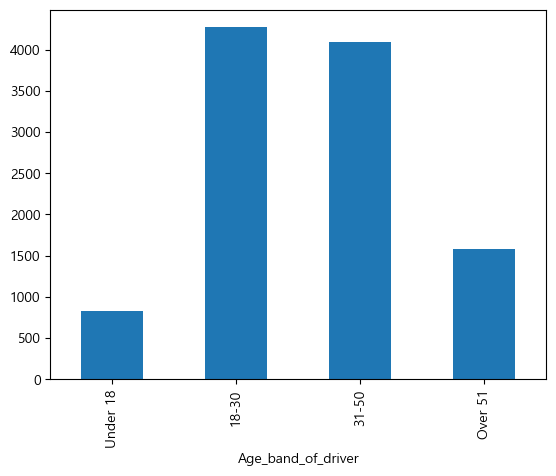

In [21]:
# 인덱스 순서 지정용 리스트
order = ['Under 18', '18-30', '31-50', 'Over 51']

# Unknown 값 제거
df_RTA['Age_band_of_driver'].replace('Unknown', pd.NA, inplace=True)
df_cleaned = df_RTA.dropna(subset=['Age_band_of_driver'])

# 인덱스 순서 바꾸고 버주 별 데이터 개수 세기
sr_age = df_cleaned['Age_band_of_driver'].value_counts().reindex(order)

sr_age.plot(kind='bar')

보이는 것처럼 사고의 발생 횟수는 18세에서 50세까지에 주로 분포되어있는 것을 알 수 있다. 

이는 애초에 운전자의 수가 해당 연령대에 많이 분포되어 있기 때문으로 보인다. 

정확한 연령대별 사고 발생률을 비교하려면 해당 데이터를 연령 별 총 운전자 수로 나누어야 할 것이다. 



In [22]:
data = sr_age.to_frame()
data.reset_index(drop=True, inplace=True)
data['Age_band_of_driver'] = order

data

,count,Age_band_of_driver
0,825,Under 18
1,4271,18-30
2,4087,31-50
3,1585,Over 51


<Axes: >

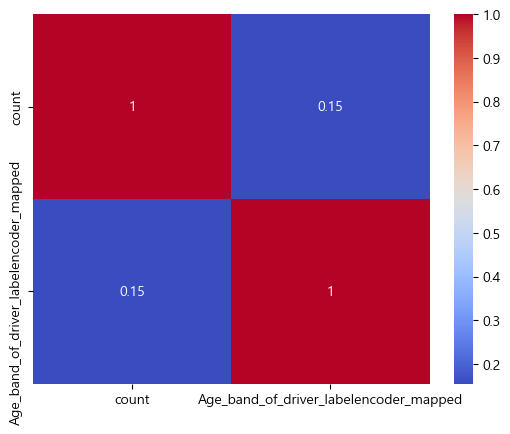

In [23]:
# 위 데이터에서 count와 Age_band_of_driver의 상관계수를 구하기

# Age_band_of_driver를 수치형으로 변환
# 데이터 바이닝

label_encoder = preprocessing.LabelEncoder()

# mapping을 사용하여 원하는 숫자로 변환
data['Age_band_of_driver_labelencoder'] = label_encoder.fit_transform(data['Age_band_of_driver'])

mapping = { label_encoder.transform(['Under 18'])[0]: 0,
            label_encoder.transform(['18-30'])[0]: 1,
            label_encoder.transform(['31-50'])[0]: 2,
            label_encoder.transform(['Over 51'])[0]: 3
          }

data['Age_band_of_driver_labelencoder_mapped'] = data['Age_band_of_driver_labelencoder'].map(mapping)
data[['count', 'Age_band_of_driver_labelencoder_mapped']].head(15)

# 상관계수 구하기
data[['count', 'Age_band_of_driver_labelencoder_mapped']].corr()

# 시각화
sns.heatmap(data[['count', 'Age_band_of_driver_labelencoder_mapped']].corr(), annot=True, cmap='coolwarm')



해당 데이터에 대한 연령대와 사고 발생 빈도의 상관계수는 0.15로 매우 낮은 수치이다. 이 데이터에 한해서는 사고 발생 빈도 수는 큰 상관관계가 없음을 의미한다고 볼 수 있다. 

 - 이는 해당 데이터가 '사고가 발생한 운전자'에 대한 데이터만 모아두었기 때문에, 연령 별 사고 발생률을 대변해주지 못하기 때문이라고 볼 수 있다.

 - 이 데이터는 발생 횟수만을 포함하고 있으며, 이에 따라 운전자 수 자체가 높은 18 ~ 50세의 구간에 빈도가 집중되어 있음을 자연스럽게 추론할 수 있다. 



다만 눈여겨 보아야 할 한 가지 특징은, 법적으로 운전이 불가능한 18세 이하 운전자의 데이터에 대해 50세 이상의 데이터와 거의 비슷한 발발횟수를 보이고 있다는 점이다. 

추가적인 


또한 법적 outlier인 18세 이하를 제외하고 다시 시각화를 진행해보면, 결과는 다음과 같다.

<Axes: xlabel='Age_band_of_driver'>

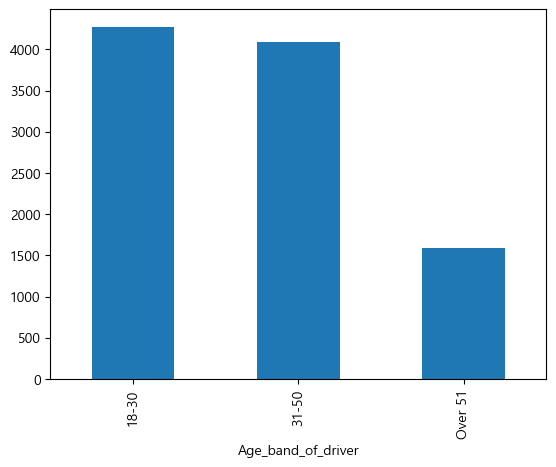

In [24]:
# 1. Under 18을 제외한 히스토그램 그리기
sr_age_exclude_under_18 = sr_age.drop('Under 18')
sr_age_exclude_under_18.plot(kind='bar')

<Axes: >

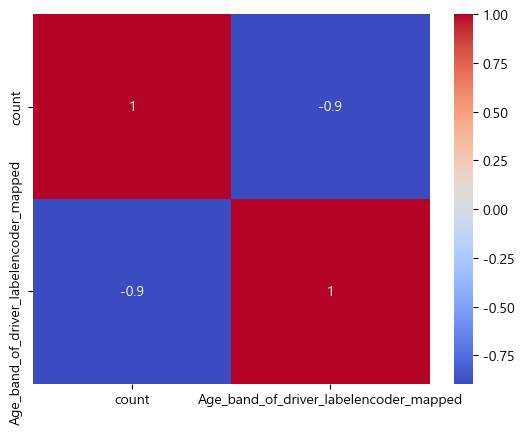

In [25]:
data_exclude_under_18 = data[data['Age_band_of_driver'] != 'Under 18']
data_exclude_under_18[['count', 'Age_band_of_driver_labelencoder_mapped']].corr()

# 시각화
sns.heatmap(data_exclude_under_18[['count', 'Age_band_of_driver_labelencoder_mapped']].corr(), annot=True, cmap='coolwarm')

이렇듯 법적으로 운전이 금지되어 있는, outlier라고 할 수 있는 미성년 운전자의 사고 데이터를 제외하고 상관계수를 구해보면, -0.9라는 강한 음의 상관관계를 보임을 알 수 있다. 

따라서 차량 사고 발생 빈도는 젊은 연령대일수록 높게 나타난다고 할 수 있다을 것이다. 

##### 이에 대한 개인적인 의견(원인 분석)
1. 젊은 층의 운전자 수가 애초에 많기 때문에(표본이 많기 때문에) 사고 발생 횟수가 높음.
2. 나이를 먹을수록 운전을 꺼려함.

## 가설 2. 일일 사고 발생 빈도는 하루의 특정 시간대에 몰려 있을 것이다.

### 2 - 1) 교통량이 높은 출퇴근 시간대에 몰려있을 것이다.

### 2 - 2) 시야 확보가 힘든 야간에 몰려있을 것이다.

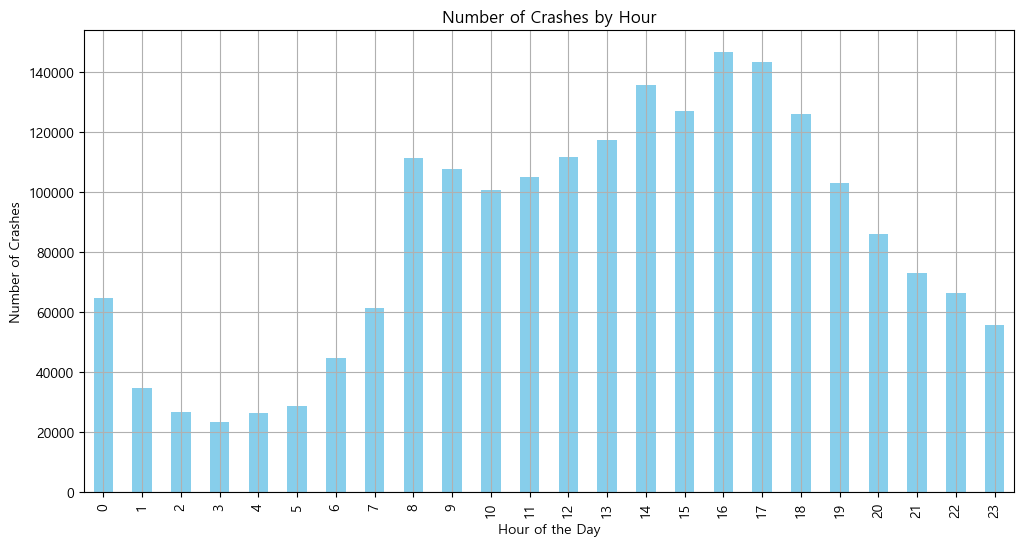

In [26]:
# 시간 데이터이므로 문자열을 시간 형식으로 변환
df_MVC['CRASH TIME'] = pd.to_datetime(df_MVC['CRASH TIME'], format='%H:%M').dt.time

# 그룹화 위해 시간으로 변환
df_2 = df_MVC['CRASH TIME'].apply(lambda x: x.hour)


# 각 시간대별 사고 횟수 집계
crash_counts = df_2.value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
crash_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.xticks(range(0, 24))  # X 축 눈금 설정
plt.show()


추가 분석 필요

## 가설 3. 연간 사고 발생 빈도는 1년의 특정 날짜에 몰려 있을 것이다.

### 3 - 1) 사고는 눈이 많이 오는 11월 ~ 1월에 주로 발생할 것이다.

### 3 - 2) 사고는 장마 등으로 인해 비가 많이 오는 6 ~ 8월에 주로 발생할 것이다.

Month     1      2      3      4      5      6      7      8      9      10  \
Year                                                                          
2012       0      0      0      0      0      0  16992  17142  16535  16864   
2013   15643  14399  16509  16439  18488  18205  17578  16759  16956  17713   
2014   16674  15738  15861  16371  18276  18410  17458  17093  17828  18086   
2015   16127  15713  17955  16793  19273  18825  18770  18980  18514  19849   
2016   18097  15987  18781  18577  20185  20711  19970  19700  19512  19677   
2017   17549  15836  19336  17829  21012  21373  19593  19137  19604  20360   
2018   18122  15990  19274  18195  20843  20796  19707  19642  19238  20820   
2019   16929  16065  17759  16829  19588  19516  18421  17215  17541  17611   
2020   14366  13704  11077   4130   6164   7647   9277   9823   9610   9710   
2021    7719   6976   8262   8752  10289  10609  10002   9880   9896  10204   
2022    7915   7391   8857   8549   9462   9478   88

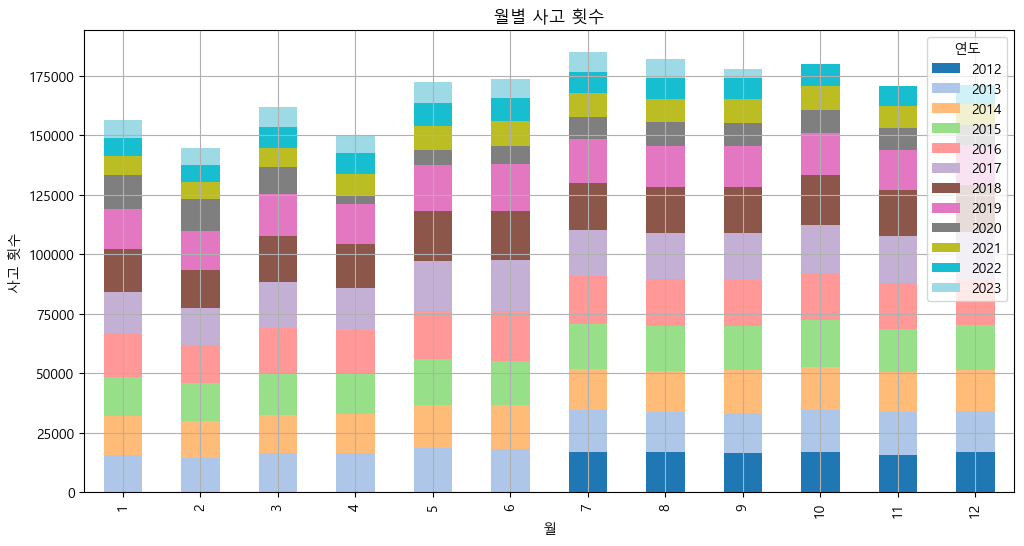

In [27]:
# 날짜 데이터이므로 문자열을 날짜 형식으로 변환
df_MVC['CRASH DATE'] = pd.to_datetime(df_MVC['CRASH DATE'], format='%m/%d/%Y')

df_MVC['Year'] = df_MVC['CRASH DATE'].dt.year
df_MVC['Month'] = df_MVC['CRASH DATE'].dt.month

# 연도와 월을 기준으로 사고 횟수를 계산
crash_counts = df_MVC.groupby(['Year', 'Month']).size().unstack(fill_value=0)

print(crash_counts)

# stacked 그래프 그리기
crash_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('월별 사고 횟수')
plt.xlabel('월')
plt.ylabel('사고 횟수')
plt.legend(title='연도')
plt.grid(True)
plt.show()

위 그래프는 월별 사고 횟수를 연도 별로 누적하여 막대 그래프로 나타낸 것이다. 

주의할 점은 2012년 전반기와 2023년 후반기 데이터가 누락되어 있다는 점이다. 

이는 데이터 수집 기간이 2012년 6월 ~ 2023년 9월이기 때문으로 보인다.

추후 코드에서 참조하는 데이터 범위를 수정하여 해당 문제를 해결해야 할 필요성이 보인다. 

2012년과 2023년은 제외해야 할 듯

## 가설 4. 차량의 종류에 따른 교통 사고 발생 빈도

### 4 - 1) 개인용 차량보다 공업용 차량의 사고 발생 빈도가 더 높을 것이다.